# Explore here

In [108]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns
import requests as r

In [109]:
#url = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'
#df = pd.read_csv(url)
#df.to_csv('../data/raw/AB_NYC_2019.csv')

In [110]:
df = pd.read_csv('../data/raw/AB_NYC_2019.csv')
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [111]:
print(
    'COLUMNS:\n ', df.columns, '\n', '\n',
    'DTYPES:\n', df.dtypes, '\n', '\n',
    'SHAPE: \n', '\tRows: ', df.shape[0], '\n\tColumns: ', df.shape[1]
)

COLUMNS:
  Index(['Unnamed: 0', 'id', 'name', 'host_id', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object') 
 
 DTYPES:
 Unnamed: 0                          int64
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_list

In [112]:
#columns_to_drop = ['Unnamed: 0', 'id', 'name','host_name', 'neighbourhood_group', 'latitude', 'longitude', 'last_review', 'reviews_per_month']
columns_to_drop = ['Unnamed: 0', 'id', 'name','host_name', 'latitude', 'longitude', 'reviews_per_month']
df = df.drop(columns=columns_to_drop)

In [113]:
print('NEW SHAPE: \n', '\tRows: ', df.shape[0], '\n\tColumns: ', df.shape[1])

NEW SHAPE: 
 	Rows:  48895 
	Columns:  10


In [114]:
cols = df.columns

for nulos in cols:
    if df[nulos].isna().sum() > 0:
        print(f'{nulos}: {df[nulos].isna().sum()}')
    else:
        print(f'No NA values in column: {nulos}')
        

No NA values in column: host_id
No NA values in column: neighbourhood_group
No NA values in column: neighbourhood
No NA values in column: room_type
No NA values in column: price
No NA values in column: minimum_nights
No NA values in column: number_of_reviews
last_review: 10052
No NA values in column: calculated_host_listings_count
No NA values in column: availability_365


In [115]:
df[df['last_review'].isnull()].tail()
df['room_type'].unique()
df['neighbourhood_group'].unique()

for u in df.columns:
    print(f'{u}: {len(df[u].unique())}')


host_id: 37457
neighbourhood_group: 5
neighbourhood: 221
room_type: 3
price: 674
minimum_nights: 109
number_of_reviews: 394
last_review: 1765
calculated_host_listings_count: 47
availability_365: 366


In [116]:
df.dtypes

host_id                            int64
neighbourhood_group               object
neighbourhood                     object
room_type                         object
price                              int64
minimum_nights                     int64
number_of_reviews                  int64
last_review                       object
calculated_host_listings_count     int64
availability_365                   int64
dtype: object

### Analysis of Univariate Variables

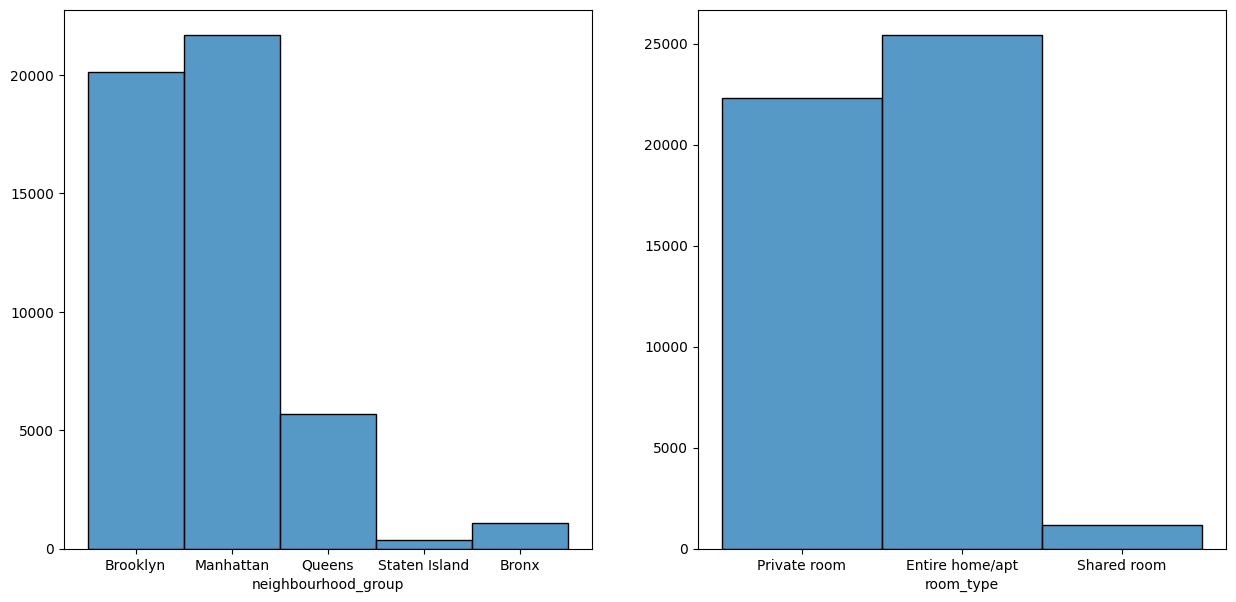

In [107]:
fig, axis = plt.subplots(ncols=2, figsize = (15, 7))

# Create a multiple histograms
sns.histplot(ax=axis[0], data = df, x = 'neighbourhood_group').set(ylabel = None)
sns.histplot(ax = axis[1], data = df, x = 'room_type').set(ylabel = None)

plt.show()

### Analysis of Numerical Variables

In [127]:
df.describe()

,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


d:\Documents\courses\4geeks-ml-template-prjs\.env-eda\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
d:\Documents\courses\4geeks-ml-template-prjs\.env-eda\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
d:\Documents\courses\4geeks-ml-template-prjs\.env-eda\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
d:\Documents\courses\4geeks-ml-template-prjs\.env-eda\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of panda

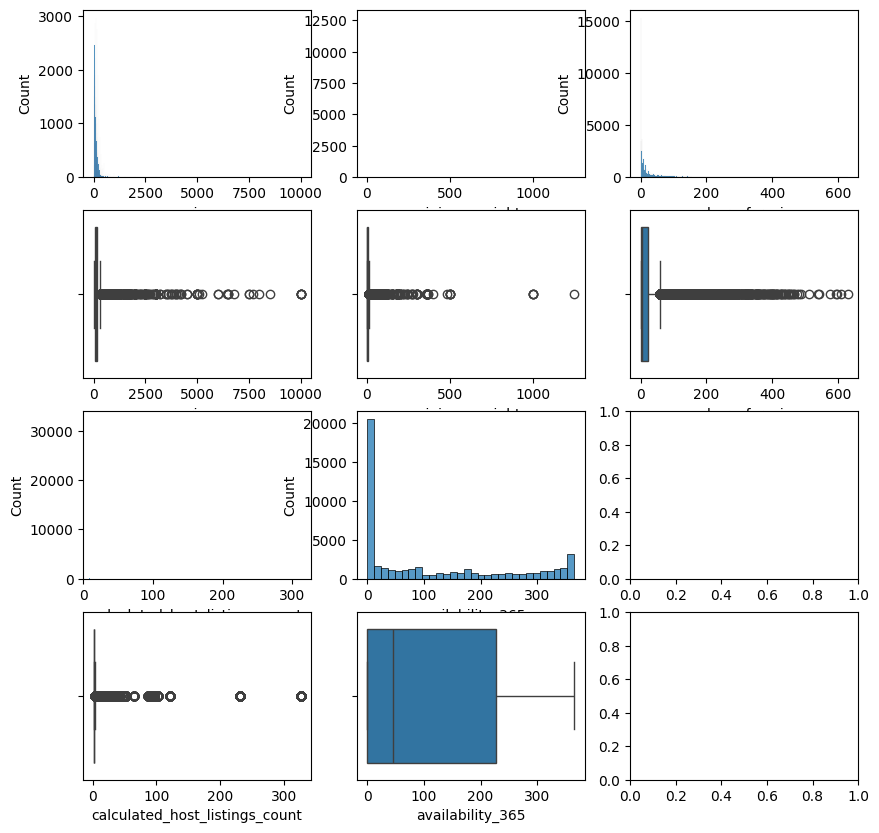

In [121]:
fig, axis = plt.subplots(4, 3, figsize=(10, 10))

sns.histplot(ax = axis[0,0], data = df, x='price')
sns.boxplot(ax = axis[1,0], data = df, x='price')

sns.histplot(ax = axis[0,1], data = df, x='minimum_nights')
sns.boxplot(ax = axis[1,1], data = df, x='minimum_nights')

sns.histplot(ax = axis[0,2], data = df, x='number_of_reviews')
sns.boxplot(ax = axis[1,2], data = df, x='number_of_reviews')

sns.histplot(ax = axis[2,0], data = df, x='calculated_host_listings_count').set_xlim(-0.1,)
sns.boxplot(ax = axis[3,0], data = df, x='calculated_host_listings_count')

sns.histplot(ax = axis[2,1], data = df, x='availability_365')
sns.boxplot(ax = axis[3,1], data = df, x='availability_365')

plt.show()

### Step 4: Analysis of multivariate variables¶